<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> Programación cientifica en Python</h1>
    <h1> Tópico 1: Introducción y numpy</h1>
    <h3> _Abril 2018_</h3>
</center>

_Notebook created by Roberto Fuentes - `roberto.fuentes@alumnos.usm.cl`- DI UTFSM ._

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def image_plot(data, title='FITS image'):
    plt.figure(figsize=(20,20))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [2]:
def comparation_plot(img1, img2, etiqueta_1, etiqueta_2):
    fig = plt.figure(figsize=(20,20))
    a = fig.add_subplot(1,2,1)
    plt.imshow(img1, cmap='gray', interpolation=None)
    a.set_title(etiqueta_1)
    
    b = fig.add_subplot(1,2,2)
    plt.imshow(img2, cmap='gray', interpolation=None)
    b.set_title(etiqueta_2)

    plt.show()

In [3]:
# first we load the data:
data = np.load("red_fox.npy")
data_1 = data[:,:,0]
data_2 = data[:,:,1]
data_3 = data[:,:,2]

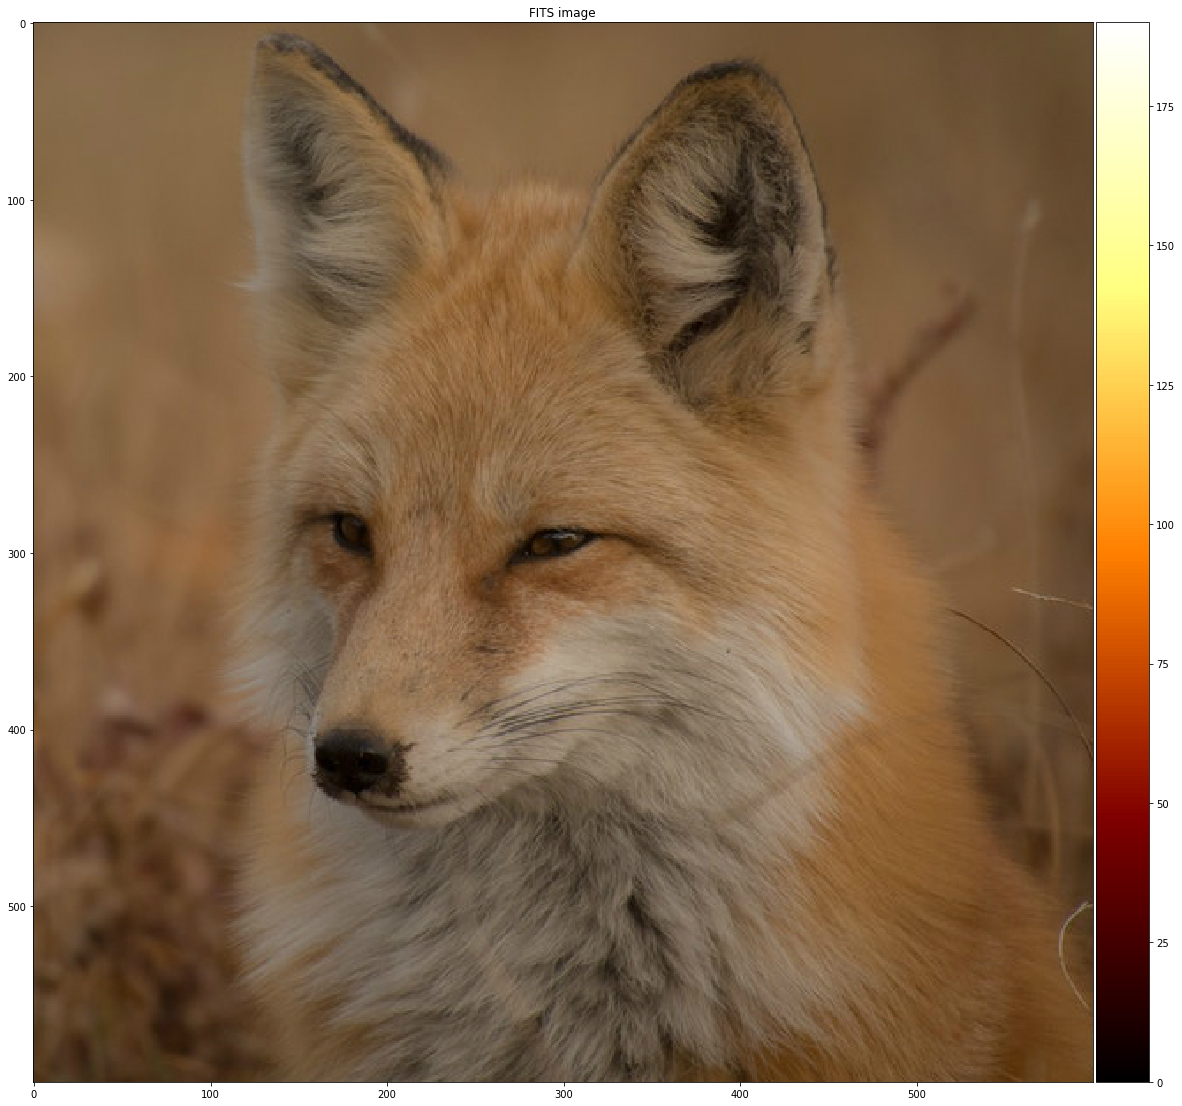

In [4]:
image_plot(data)

### Paso 1) 

Calcular el `RMS` de la imagen entregada. 

$$RMS = \sqrt{\frac{1}{m\ n} \sum_{i=1}^m \sum_{j=1}^n \texttt{data[i,j]}^2}$$

__Nota:__ Computarlo de forma vectorizada.

## Respuesta:

In [5]:
def RMS(data):
    factor = 1/(data.shape[0]*data.shape[1])
    suma = ((data**2).sum(axis=1)).sum()
    return np.sqrt(factor*suma)

### Paso 2) 

Genere otro arreglo donde los pixeles con intensidades por debajo del `RMS` son considerados como _no usables_ (con valor `=0`).  Mostrar tal imagen resultante.

## Respuesta:

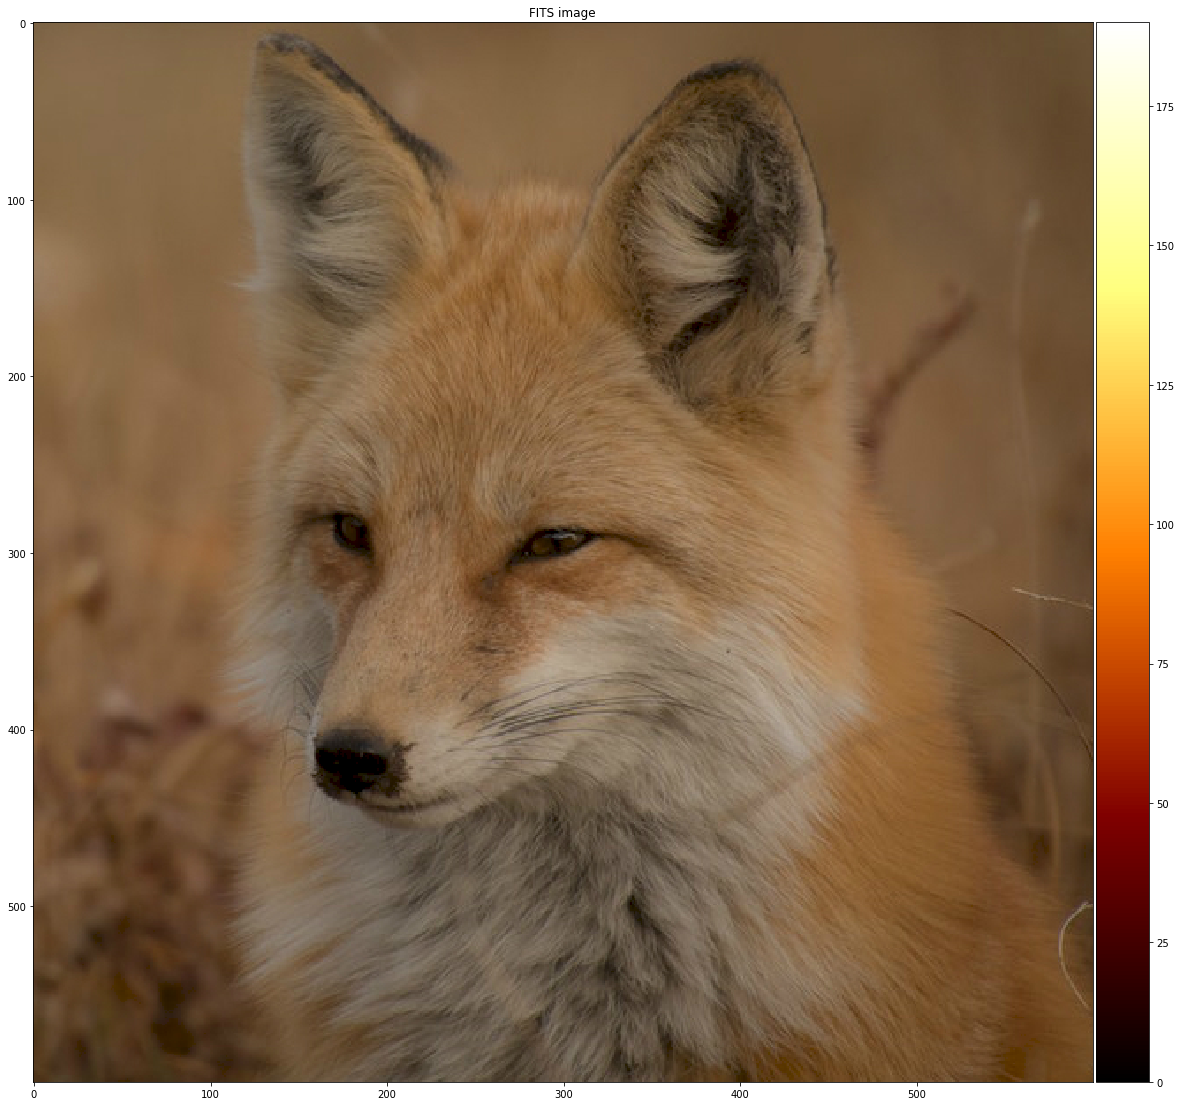

In [6]:
#Creamos una mascara donde todos los valores que sean mayores a nuestro factor RMS sean verdaderos, y los demas sean False
mask= data > RMS(data)
#multiplicamos ambas matrices haciendo operaciones element wise, ya que True mantendra el mismo valor, mientras que False hara los valores 0.
intensidad = mask*data
#Finalmente mostramos la imagen resultante.
image_plot(intensidad)

### Paso 3)

Crear la función
```python
def apply_filter(data, mask, kernel_filter):
    ...
    return None
```
Que reciba el arreglo de datos completo `data`, el arreglo booleano con los __pixeles usables__ `mask` (sobre el RMS), y kernel de filtro de `3x3`. La función debe convolucionar `filter` sobre la imagen `data`, sólo en los pixeles usables. La función debe retornar la data modificada.

Finalmente mostrar el resultado de convolucionar tal filtro en `data` (mostrar imágen).

__Nota:__ Debe usar siempre que pueda _instrucciones vectorizadas_.

__Image convolution:__ https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

## Respuesta:

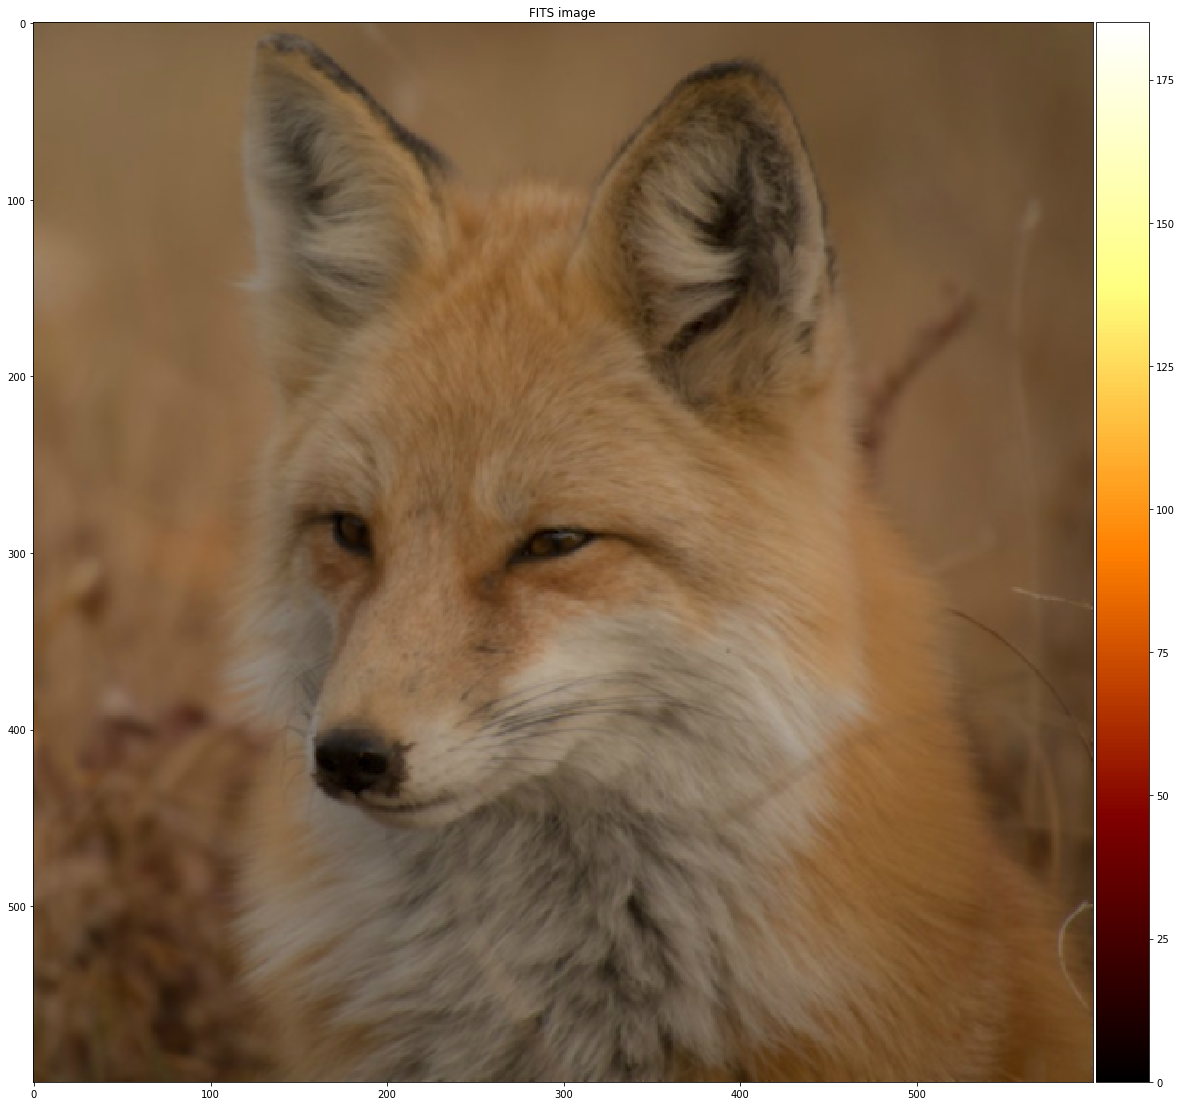

In [7]:
# Gaussian blur filter: Ocupar este filtro!
kernel_filter = 1./16. * np.array([[1,2,1], [2,4,2], [1,2,1]])

mask_1 = data_1 > RMS(data_1)
mask_2 = data_2 > RMS(data_2)
mask_3 = data_3 > RMS(data_3)

def apply_filter(data_i,mask_i,kernel_filter):
    #Vemos los indices donde la mascara sea 1, ya que estos seran los valores donde aplicaremos el filtro. 
    modify_values = np.where(mask_i==1)
    for i in range(len(modify_values[0])):
        #Verificamos que no estemos en el borde de la imagen
        if(modify_values[0][i]-1 > -1 and modify_values[1][i]-1 > -1 and
           modify_values[0][i]+1 < data_i.shape[0] and modify_values[1][i]+1 < data_i.shape[0]):
            #Recorremos este arreglo y definimos sub_matrix, que sera la matriz de 3x3 con centro el valor distinto de 0.
            sub_matrix = data_i[modify_values[0][i]-1:modify_values[0][i]+2,modify_values[1][i]-1:modify_values[1][i]+2]
            #Multiplicamos el kernel_filter y nuestra sub_matriz mediante element wise y sumamos todos los valores,
            #remplazando el valor de data en esos indices.
            data_i[modify_values[0][i],modify_values[1][i]] = (np.multiply(kernel_filter, sub_matrix)).sum(axis=1).sum()
    return data_i

#mostramos la imagen con el filtro correspondiente
image_red = apply_filter(data_1,mask_1,kernel_filter) 
image_green = apply_filter(data_2,mask_2,kernel_filter) 
image_blue = apply_filter(data_3,mask_3,kernel_filter)
image_reconstructed = np.zeros((data.shape[0],data.shape[1],3),dtype=np.uint8)
image_reconstructed[:,:,0] = image_red
image_reconstructed[:,:,1] = image_green
image_reconstructed[:,:,2] = image_blue
image_plot(image_reconstructed)

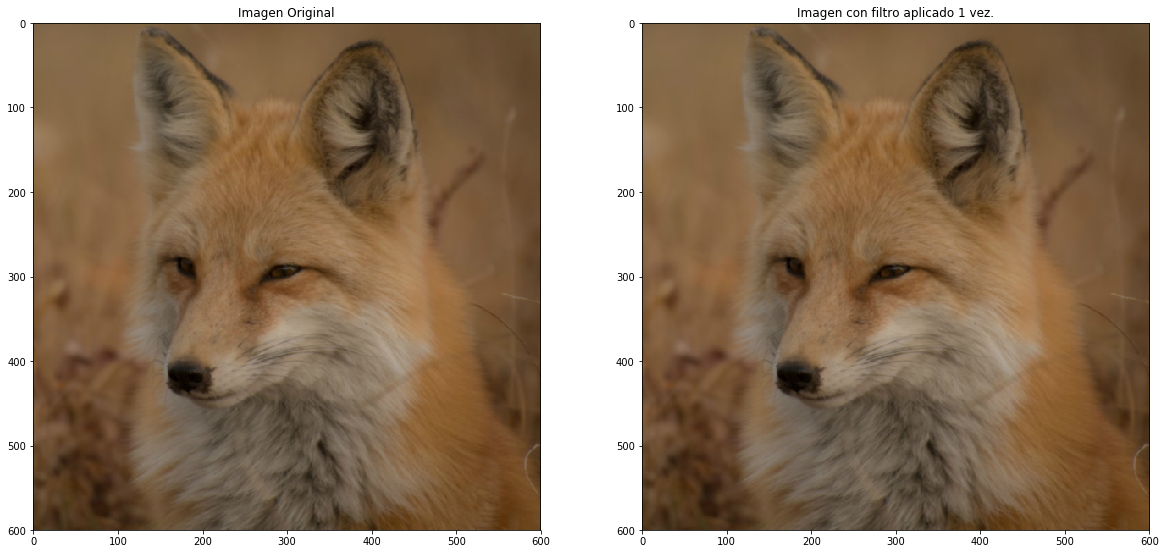

In [8]:
comparation_plot(data, image_reconstructed, "Imagen Original", "Imagen con filtro aplicado 1 vez.")

In [9]:
for i in range(10):
    mask_1 = image_reconstructed[:,:,0] > RMS(image_reconstructed[:,:,0])
    mask_2 = image_reconstructed[:,:,1] > RMS(image_reconstructed[:,:,1])
    mask_3 = image_reconstructed[:,:,2] > RMS(image_reconstructed[:,:,2])

    image_red = apply_filter(image_reconstructed[:,:,0],mask_1,kernel_filter) 
    image_green = apply_filter(image_reconstructed[:,:,1],mask_2,kernel_filter) 
    image_blue = apply_filter(image_reconstructed[:,:,2],mask_3,kernel_filter)
    
    image_reconstructed[:,:,0] = image_red
    image_reconstructed[:,:,1] = image_green
    image_reconstructed[:,:,2] = image_blue

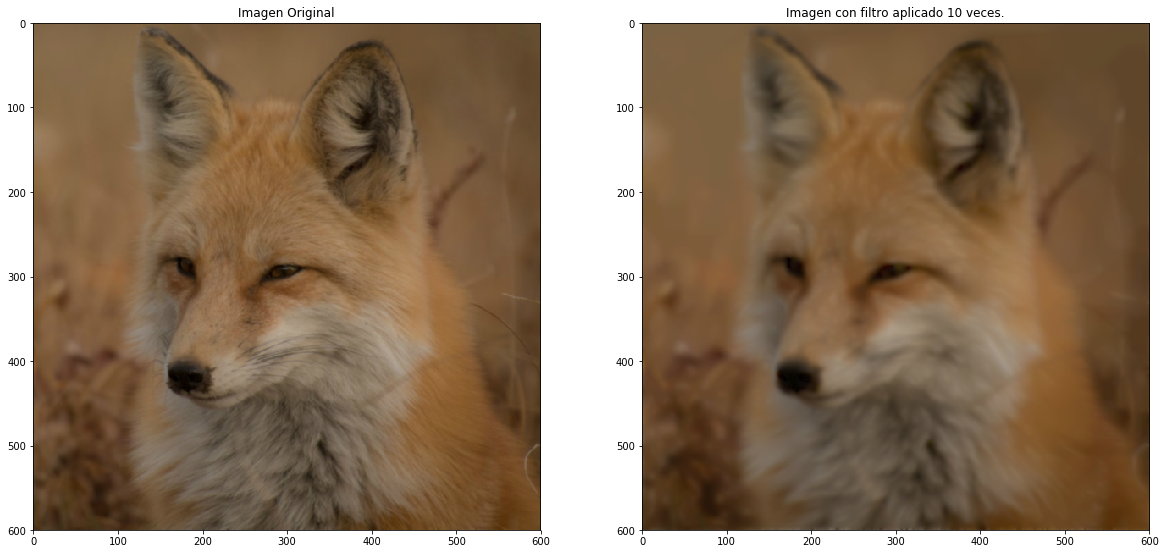

In [10]:
comparation_plot(data, image_reconstructed, "Imagen Original", "Imagen con filtro aplicado 10 veces.")